In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv("Automobile.csv")

In [417]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [15]:
df1=df.copy()

In [ ]:
df

In [17]:
df1["brand"]=df1["name"].str.split(" ").str[0]

In [19]:
df1["name"]=df1["name"].apply(lambda x:" ".join(x.split()[1:]))

In [21]:
df1.columns[9]

'brand'

In [23]:
df1["brand"].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [25]:
df1.loc[df1["brand"]=="maxda","brand"]="mazda"

In [27]:
df1.loc[df1["brand"]=="chevy","brand"]=	"chevrolet"

In [29]:
df1.loc[df1["brand"]=="chevroelt","brand"]=	"chevrolet"

In [33]:
df1.loc[df1["brand"]=="mercedes","brand"]=	"mercedes-benz"

In [35]:
df1.loc[df1["brand"]=="vokswagen","brand"]=	"volkswagen"

In [40]:
df1.loc[df1["brand"]=="vw","brand"]="volkswagen"

In [42]:
df1=df1.iloc[:,[9,0,1,2,3,4,5,6,7,8]]

In [45]:
sorted(df1["brand"].unique())

['amc',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'capri',
 'chevrolet',
 'chrysler',
 'datsun',
 'dodge',
 'fiat',
 'ford',
 'hi',
 'honda',
 'mazda',
 'mercedes-benz',
 'mercury',
 'nissan',
 'oldsmobile',
 'opel',
 'peugeot',
 'plymouth',
 'pontiac',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'triumph',
 'volkswagen',
 'volvo']

In [47]:
df1["mpg"] = df1["mpg"].apply(lambda x: round((100 * 3.78541) / (x * 1.60934),1))

In [49]:
df1.rename(columns={"mpg":"fuel_efficiency"},inplace=True)

In [51]:
df1

,brand,name,fuel_efficiency,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet,chevelle malibu,13.1,8,307.0,130.0,3504,12.0,70,usa
1,buick,skylark 320,15.7,8,350.0,165.0,3693,11.5,70,usa
2,plymouth,satellite,13.1,8,318.0,150.0,3436,11.0,70,usa
3,amc,rebel sst,14.7,8,304.0,150.0,3433,12.0,70,usa
4,ford,torino,13.8,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...,...,...
393,ford,mustang gl,8.7,4,140.0,86.0,2790,15.6,82,usa
394,volkswagen,pickup,5.3,4,97.0,52.0,2130,24.6,82,europe
395,dodge,rampage,7.4,4,135.0,84.0,2295,11.6,82,usa
396,ford,ranger,8.4,4,120.0,79.0,2625,18.6,82,usa


In [53]:
df1["displacement"]=df1["displacement"].apply(lambda x:round(x*0.016387064,1))

In [55]:
df1["weight"]=df1["weight"].apply(lambda x:round(x*0.45359237))

In [57]:
df1=df1.rename(columns={"weight":"weight(kg)"})

In [59]:
df1=df1.rename(columns={"displacement":"displacement(L)"})

In [456]:
df1

,brand,name,fuel_efficiency,cylinders,displacement(L),horsepower,weight(kg),acceleration,model_year,origin
0,chevrolet,chevelle malibu,13.1,8,5.0,130.0,1589,12.0,70,usa
1,buick,skylark 320,15.7,8,5.7,165.0,1675,11.5,70,usa
2,plymouth,satellite,13.1,8,5.2,150.0,1559,11.0,70,usa
3,amc,rebel sst,14.7,8,5.0,150.0,1557,12.0,70,usa
4,ford,torino,13.8,8,4.9,140.0,1564,10.5,70,usa
...,...,...,...,...,...,...,...,...,...,...
393,ford,mustang gl,8.7,4,2.3,86.0,1266,15.6,82,usa
394,vw,pickup,5.3,4,1.6,52.0,966,24.6,82,europe
395,dodge,rampage,7.4,4,2.2,84.0,1041,11.6,82,usa
396,ford,ranger,8.4,4,2.0,79.0,1191,18.6,82,usa


In [409]:
df1.loc[df1["brand"]=="toyouta"]

AttributeError: 'str' object has no attribute 'loc'

In [61]:
df1.loc[df1["brand"]=="toyouta","brand"]="toyota"

In [63]:
df1.drop(df1.loc[df1["brand"]=="hi"].index,inplace=True)

In [65]:
df1.dropna(inplace=True)
df1=df1.reset_index(drop=True)

In [67]:
corr=df1[["fuel_efficiency","cylinders","displacement(L)","horsepower","weight(kg)","acceleration"]].corr()

In [69]:
df1.to_csv("cleaned_data.csv",index=False)

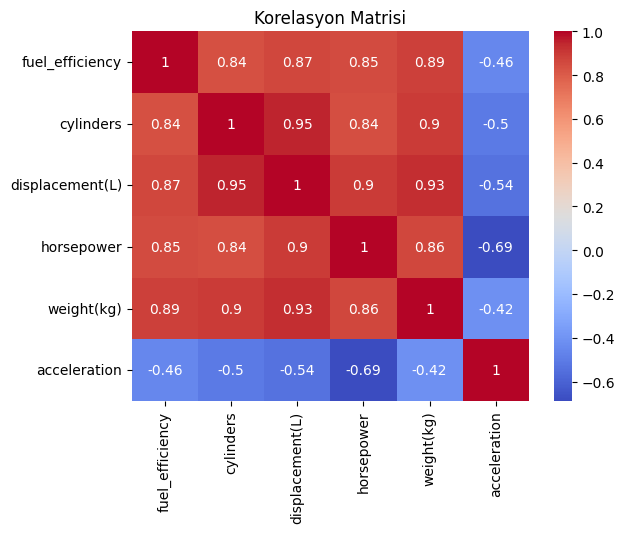

In [370]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()